Error: 'MLII' column not found in C:/Users/abdulssekyanzi/EDA Dataset.csv/102.csv. Please check your CSV files.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 250, 32)             │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 125, 32)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 125, 16)             │           1,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 63, 16)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 63, 8)               │             392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_transpose (Conv1DTranspose)   │ (None, 126, 16)             │             400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_transpose_1 (Conv1DTranspose) │ (None, 252, 32)             │           1,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 252, 1)              │              97 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ cropping1d (Cropping1D)              │ (None, 250, 1)              │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,137 (16.16 KB)

 Trainable params: 4,137 (16.16 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - loss: 0.9007 - val_loss: 0.6657
Epoch 2/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.6758 - val_loss: 0.6650
Epoch 3/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.6635 - val_loss: 0.6648
Epoch 4/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.6561 - val_loss: 0.6647
Epoch 5/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.6949 - val_loss: 0.6646
Epoch 6/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - loss: 0.6637 - val_loss: 0.6645
Epoch 7/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.7026 - val_loss: 0.6644
Epoch 8/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - loss: 0.6922 - val_loss: 0.6643
Epoch 9/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - loss: 0.7017 - val_loss: 0.6643
Epoch 10/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.6551 - val_loss: 0.6642
Epoch 11/50
260/260 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.6669 - val_loss: 0.6642
Epoch 12/50
260/260 ━━━━━━━━━━━━━━━━━━━━

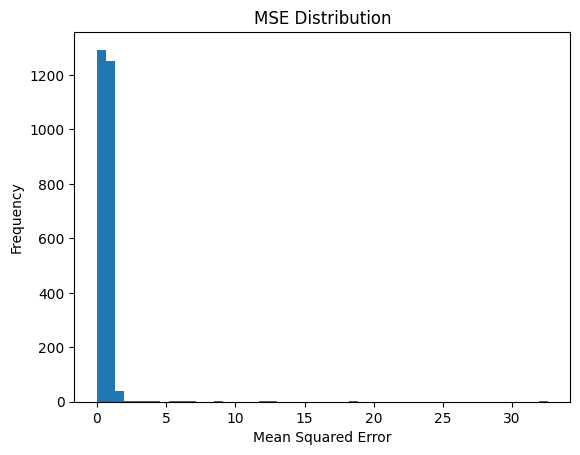

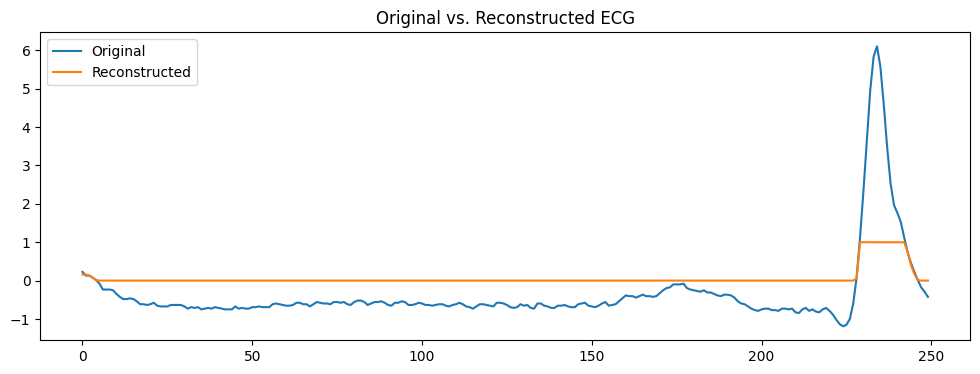

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# --- 1. Data Loading and Preprocessing ---

def load_and_preprocess_data(file_path):
    """Loads a single patient's ECG data and preprocesses it."""
    df = pd.read_csv(file_path)

    # **CRUCIAL STEP: Verify the actual column name!**
    # **Open your CSV files and replace 'MLII' with the correct column name.**
    # **Example: If the column is named 'ecg_signal', change it to:**
    # df = df[['ecg_signal']].values
    # **Replace 'MLII' with the actual column name from your CSV files.**

    if 'MLII' in df.columns:
        df = df[['MLII']].values
    else:
        # This is a fail-safe.
        print(f"Error: 'MLII' column not found in {file_path}. Please check your CSV files.")
        return None  # Return None to skip this file.

    scaler = StandardScaler()
    df = scaler.fit_transform(df)  # standardize the data.
    return df

def create_episodes(data, episode_length=250, stride=100):
    """Creates episodes (windows) from the ECG data."""
    episodes = []
    for i in range(0, len(data) - episode_length, stride):
        episode = data[i:i + episode_length]
        episodes.append(episode)
    return np.array(episodes)

# Example usage (replace with your actual file paths):
patient_files = [
    "C:/Users/abdulssekyanzi/EDA Dataset.csv/100.csv",
    "C:/Users/abdulssekyanzi/EDA Dataset.csv/101.csv",
    "C:/Users/abdulssekyanzi/EDA Dataset.csv/102.csv",
]  # add more files
all_episodes = []

for file in patient_files:
    patient_data = load_and_preprocess_data(file)
    if patient_data is not None:  # Check if data was loaded correctly.
        patient_episodes = create_episodes(patient_data)
        all_episodes.extend(patient_episodes)

all_episodes = np.array(all_episodes)

# Split data into training and testing sets.
train_episodes, test_episodes = train_test_split(
    all_episodes, test_size=0.2, random_state=42
)

# --- 2. Model Building (Autoencoder with Cropping) ---

# --- 2. Model Building (Autoencoder) ---

input_shape = train_episodes.shape[1:]  # (250, 1)

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=input_shape),
    
    # Encoder
    tf.keras.layers.Conv1D(32, 3, activation='relu', padding='same'),
    tf.keras.layers.MaxPooling1D(2, padding='same'),  # Reduces length to 125
    tf.keras.layers.Conv1D(16, 3, activation='relu', padding='same'),
    tf.keras.layers.MaxPooling1D(2, padding='same'),  # Reduces length to 63
    tf.keras.layers.Conv1D(8, 3, activation='relu', padding='same'),
    
    # Decoder
    tf.keras.layers.Conv1DTranspose(16, 3, activation='relu', padding='same', strides=2),  # Increases length to 126
    tf.keras.layers.Conv1DTranspose(32, 3, activation='relu', padding='same', strides=2),  # Increases length to 252
    tf.keras.layers.Conv1D(1, 3, activation='sigmoid', padding='same'),
    
    # Cropping to match input length (250)
    tf.keras.layers.Cropping1D(cropping=(1, 1)),  # Crops 1 from start and 1 from end to get 250
])

model.compile(optimizer='adam', loss='mse')

# Print Model Summary
model.summary()
# --- 3. Model Training ---
model.fit(train_episodes, train_episodes, epochs=50, validation_split=0.2)

# --- 4. Anomaly Detection (Reconstruction Error) ---
reconstructed_test = model.predict(test_episodes)

# Ensure the correct shape.
if reconstructed_test.shape[1] != 250:
    difference = reconstructed_test.shape[1] - 250
    if difference > 0:
        crop_start = difference // 2
        crop_end = difference - crop_start
        reconstructed_test = reconstructed_test[:, crop_start: -crop_end, :]

mse = np.mean(np.square(test_episodes - reconstructed_test), axis=(1, 2))

# Thresholding (You'll need to experiment with this)
threshold = np.percentile(mse, 95)
anomalies = test_episodes[mse > threshold]
print(f"Number of anomalies detected: {len(anomalies)}")

# Print the MSE values
print("MSE Values:", mse)

# Plot the MSE distribution
plt.hist(mse, bins=50)
plt.xlabel("Mean Squared Error")
plt.ylabel("Frequency")
plt.title("MSE Distribution")
plt.show()

# Example of plotting original vs reconstructed.
example_index = 0
plt.figure(figsize=(12, 4))
plt.plot(test_episodes[example_index].flatten(), label="Original")
plt.plot(reconstructed_test[example_index].flatten(), label="Reconstructed")
plt.legend()
plt.title("Original vs. Reconstructed ECG")
plt.show()